# Gaussian Quadrature - Isolated Saddlepoints
This document attempts to reproduce the examples of Donnelly et. al (2021).

We "consider the numerical evaluation of the following family of integrals":
$$
I(a,b) \equiv \int_{-\infty}^\infty d k \,\, k^b e^{i ka},
\quad
a \geq 2,
\quad
b \geq 0
$$
"whose exact solution is given by"
$$
I_\text{ex}(a,b)
= \frac{2}{a} \,
\Gamma\left( \frac{2 \chi}{\pi} \right)
\times
\eta(\chi; a, b)
$$
"where we have defined"
$$
\eta(\chi, a, b)
= 
\begin{cases}
e^{i \chi}      & \bar{a} = 0 \land \bar{b} = 0 \\
0               & \bar{a} = 0 \land \bar{b} = 1 \\
\cos(\chi)      & \bar{a} = 1 \land \bar{b} = 0 \\
i \sin(\chi)    & \bar{a} = 1 \land \bar{b} = 1 \\
\end{cases} \\
\chi \equiv \frac{1 + b}{2 a} \pi,
\quad
\bar{a} \equiv a \mod 2,
\quad
\bar{b} \equiv b \mod 2
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl
from scipy.special import airy, gamma

rcParams.update(mpl.rcParamsDefault)
rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern Roman"],
    "font.size": 16})
rcParams['axes.titlepad'] = 20

In [2]:
def I_ex(a, b):
    '''Returns exact value of integral: $\int_{-\infty}^\infty d k \,\, k^b e^{i ka}$'''
    chi = np.pi * (1+b)/(2*a)

    def eta(chi, a, b):
        a_bar = a % 2
        b_bar = b % 2
        if a_bar == 0 and b_bar == 0:
            return np.exp(1j*chi)
        elif a_bar == 0 and b_bar == 1:
            return 0
        elif a_bar == 1 and b_bar ==0:
            return np.cos(chi)
        else:
            return 1j*np.sin(chi)
    
    return 2/a * gamma(2*chi/np.pi) * eta(chi, a, b)

In [3]:
def get_nodes_and_weights(n):
    '''Returns nodes and weights from Freud polynomials for evaluating gaussian quadrature.'''
    nodes = [
        [5.64189583547756e-1],
        [3.00193931060839e-1, 1.25242104533372e-0],
        [1.90554149798192e-1, 8.48251867544577e-1, 1.79977657841573e-0],
        [1.33776446996068e-1, 6.24324690187190e-1, 1.34253782564499e-0, 2.26266447701036e-0],
        [1.00242151968216e-1, 4.82813966046201e-1, 1.06094982152572e-0, 1.77972941852026e-0, 2.66976035608766e-0],
        [7.86006594130979e-2, 3.86739410270631e-1, 8.66429471682044e-1, 1.46569804966352e-0, 2.17270779693900e-0, 3.03682016932287e-0],
        [6.37164846067008e-2, 3.18192018888619e-1, 7.24198989258373e-1, 1.23803559921509e-0, 1.83852822027095e-0, 2.53148815132768e-0, 3.37345643012458e-0],
        [5.29786439318514e-2, 2.67398372167767e-1, 6.16302884182402e-1, 1.06424631211623e-0, 1.58885586227006e-0, 2.18392115309586e-0, 2.86313388370808e-0, 3.68600716272440e-0],
        [4.49390308011934e-2, 2.28605305560535e-1, 5.32195844331646e-1, 9.27280745338081e-1, 1.39292385519588e-0, 1.91884309919743e-0, 2.50624783400574e-0, 3.17269213348124e-0, 3.97889886978978e-0],
        [3.87385243257289e-2, 1.98233304013083e-1, 4.65201111814767e-1, 8.16861885592273e-1, 1.23454132402818e-0, 1.70679814968913e-0, 2.22994008892494e-0, 2.80910374689875e-0, 3.46387241949586e-0, 4.25536180636608e-0]
    ]
    weights = [
        [8.86226925452758e-1],
        [6.40529179684379e-1, 2.45697745768379e-1],
        [4.46029770466658e-1, 3.96468266998335e-1, 4.37288879877644e-2],
        [3.25302999756919e-1, 4.21107101852062e-1, 1.33442500357520e-1, 6.37432348625728e-3],
        [2.48406152028443e-1, 3.92331066652399e-1, 2.11418193076057e-1, 3.32466603513439e-2, 8.24853344515628e-4],
        [1.96849675488598e-1, 3.49154201525395e-1, 2.57259520584421e-1, 7.60131375840058e-2, 6.85191862513596e-3, 9.84716452019267e-5],
        [1.60609965149261e-1, 3.06319808158099e-1, 2.75527141784905e-1, 1.20630193130784e-1, 2.18922863438067e-2, 1.23644672831056e-3, 1.10841575911059e-5],
        [1.34109188453360e-1, 2.68330754472640e-1, 2.75953397988422e-1, 1.57448282618790e-1, 4.48141099174625e-2, 5.36793575602526e-3, 2.02063649132407e-4, 1.19259692659532e-6],
        [1.14088970242118e-1, 2.35940791223685e-1, 2.66425473630253e-1, 1.83251679101663e-1, 7.13440493066916e-2, 1.39814184155604e-2, 1.16385272078519e-3, 3.05670214897831e-5, 1.23790511337496e-7],
        [9.85520975191087e-2, 2.08678066608185e-1, 2.52051688403761e-1, 1.98684340038387e-1, 9.71984227600620e-2, 2.70244164355446e-2, 3.80464962249537e-3, 2.28886243044656e-4, 4.34534479844469e-6, 1.24773714817825e-8]
    ]
    return np.array(nodes[n-1]), np.array(weights[n-1])

In [4]:
def integrate_gauss_freud_quad(f, n):
    '''Integrate f(x) from 0 to ∞ using Gauss Freud Quadrature of order n'''
    x_j, w_j = get_nodes_and_weights(n)
    return np.dot(w_j,  np.exp(x_j**2)*f(x_j))

In [5]:
# Define function to be integrated.
def g(k, b):
    return k**b

def f(k, a):
    return k**a

def h(k, a, b):
    return g(k, b)*np.exp(1j*f(k,a))

# Define directions of contour integration
def sigma(a):
    sigma_p = np.pi/(2*a)
    if (a % 2) == 0:
        sigma_m = sigma_p - np.pi
    else:
        sigma_m = np.pi - sigma_p
    return sigma_p, sigma_m

In [9]:
# Calcultate Integrals
b = 0
a_vals = np.array([2, 3, 4])
quad_orders = np.arange(1,11)
I_quads = np.zeros((len(quad_orders), len(a_vals)), dtype=np.complex_)
I_exs = np.zeros((len(quad_orders), len(a_vals)), dtype=np.complex_)

for i, n in enumerate(quad_orders):
    for j, a in enumerate(a_vals):
        s_p, s_m = 1, 1
        sigma_p, sigma_m = sigma(a)
        l_p, l_m = np.exp(1j*sigma_p)/np.sqrt(s_p), np.exp(1j*sigma_m)/np.sqrt(s_m)
        I_quads[i, j] = integrate_gauss_freud_quad(
            lambda l: (h(l*l_p, a, b) * l_p - h(l*l_m, a, b) * l_m),
            n = n
        )
        I_exs[i, j] = I_ex(a, b)

I_err = np.abs(I_exs - I_quads)

### Error  Plots (Reproduced FIG. 3)

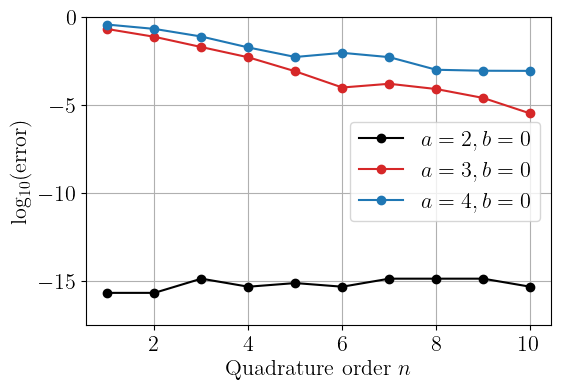

In [13]:
from cycler import cycler

labels = [r'$a = ' + str(a) + ', b = ' + str(b) + '$' for a in a_vals]
fig, ax = plt.subplots(figsize=(6,4))
ax.set_prop_cycle(cycler(color=['k', 'tab:red', 'tab:blue']))
ax.plot(quad_orders, np.log10(I_err), 'o-', label=labels)
ax.legend()
ax.set_ylim(-17.5,0)
ax.set_xlabel(r'Quadrature order $n$')
ax.set_ylabel(r'$\mathrm{log_{10}(error)}$')
ax.grid()
plt.show()

### Contour Plots (Reproduced FIG. 2)

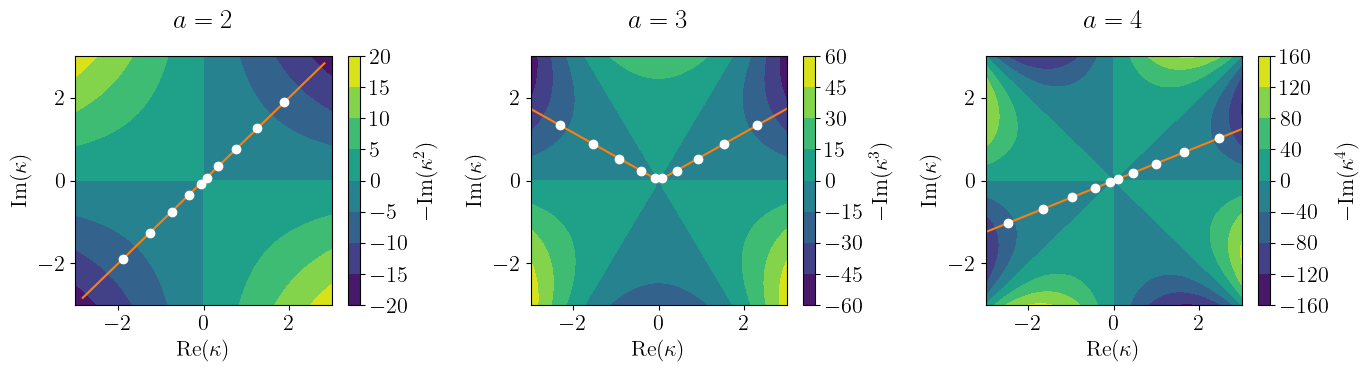

In [8]:
k_R = np.linspace(-3,3)
k_I = np.linspace(-3,3)
K_R, K_I = np.meshgrid(k_R, k_I)
K = K_R + 1j*K_I

fig, axes = plt.subplots(1,3, figsize=(14,4))
for i, a in enumerate(a_vals):
    axes[i].set_title('$a = ' + str(a) + '$')

    # Plot $- Im{ f(k,a) }$ (imaginary part of phase function)
    contour_plot = axes[i].contourf(K_R, K_I, -np.imag(f(K, a)))
    fig.colorbar(contour_plot, label=r'$- \mathrm{Im}(\kappa^' + str(a) + ')$', ax=axes[i])
    axes[i].set_xlabel(r'$\mathrm{Re}(\kappa)$')
    axes[i].set_ylabel(r'$\mathrm{Im}(\kappa)$')

    # Plot path for evaluating integral
    sigma_p, sigma_m = sigma(a)
    l = np.linspace(-4, 4, 1000, dtype=np.complex_)
    C = lambda l: np.abs(l) * np.piecewise(l, [l <= 0, l > 0], [lambda l: np.exp(1j*sigma_m), lambda l: np.exp(1j*sigma_p)])
    C_R = lambda l: np.real(C(l))
    C_I = lambda l: np.imag(C(l))
    axes[i].plot(C_R(l), C_I(l), color='tab:orange')
    axes[i].set_xlim((np.min(k_R), np.max(k_R)))
    axes[i].set_ylim((np.min(k_I), np.max(k_I)))

    # Plot node points along integral path
    l_j, _ = get_nodes_and_weights(n=5)
    l_j = l_j.astype(np.complex_)
    axes[i].plot(C_R(-l_j), C_I(-l_j), 'ow')
    axes[i].plot(C_R(l_j), C_I(l_j), 'ow')
    # l_p, l_m = np.exp(1j*sigma_p)/np.sqrt(s_p), np.exp(1j*sigma_m)/np.sqrt(s_m)
    # l_nodes = np.hstack((l_j*l_m, l_j*l_p))
    # l_R, l_I = np.real(l_nodes), np.imag(l_nodes)
    # axes[i].plot(l_R, l_I, 'ow')
plt.tight_layout()